In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [4]:
# Leer archivo Excel
xls = pd.ExcelFile('Equivalente_electrico.xlsx')
wdata = pd.read_excel(xls, sheet_name=0, usecols=('t','T')).to_numpy()
idata = pd.read_excel(xls, sheet_name=1, usecols=('t','T')).to_numpy()

# C a K
wdata[:,1] = [y+273.15 for y in wdata[:,1]]
idata[:,1] = [y+273.15 for y in idata[:,1]]

In [22]:
def graph(data,title,xdom=None,fit=None,xdom2=None,fit2=None):
    def linf(x,a,b):   return a*x+b
    
    fig, (ax1) = plt.subplots(1, 1, figsize=(7,5))

    ax1.scatter(data[:,0],data[:,1], marker='o', color='xkcd:dark orange', linewidth=1, zorder=3, label='Datos')
    if type(fit) != type(None):  ax1.plot(xdom, linf(xdom,fit[0],fit[1]), color='xkcd:bright blue', linewidth=1.5, zorder=2, label=f'T(s) = {fit[0]:.6f}s + {fit[1]:.2f}')
    if type(fit2) != type(None):  ax1.plot(xdom2, linf(xdom2,fit2[0],fit2[1]), color='xkcd:violet', linewidth=1.5, zorder=2, label='Ajuste 2')

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(ls='--', zorder=0)
    ax1.set_title(title)
    ax1.set_ylabel("E (J)")
    ax1.set_xlabel("Q (cal)")
    ax1.legend()
    fig.savefig(f'{title}.png',dpi=300)

In [2]:
print('Equivalente del calorimetro:',139.8*(90-52)/(52-22)-151.3)
print('Equivalente del calorimetrov2:',139.85*(90.5-52.5)/(51.5-21.5)-151.25)

Equivalente del calorimetro: 25.78
Equivalente del calorimetrov2: 25.893333333333345


### Equivalente eléctrico y calor latente

Primero las regresiones:

In [20]:
def linf(x,a,b):   return a*x+b
# Equivalente eléctrico del calor
## Temperatura
wfit, wcov = curve_fit(linf, wdata[:,0],wdata[:,1])
wx = range(wdata[0,0],wdata[-1,0])

print(f'Equivalente eléctrico: {wfit[0]:.6f}x + {wfit[1]:.3f}')

## Calor
heatw = wdata.copy()
heatw[:,1] = [1*(287.7+25.78)*(i - heatw[0,1]) for i in heatw[:,1]]

heatfitw, _ = curve_fit(linf, heatw[:,0],heatw[:,1])
hwx = range(heatw[0,0],heatw[-1,0])

## Potencia
heatp = [1.5*6.9*x for x in wx]

# Calor latente de fusión
ifit, icov = curve_fit(linf, idata[6:,0],idata[6:,1])
ix = range(idata[4,0],idata[-1,0])

ixf = range(idata[0,0],idata[7,0])
ifit2, icov2 = curve_fit(linf, idata[0:4,0],idata[0:4,1])

print(f'Calor latente de fusión: {ifit[0]:.6f}x + {ifit[1]:.3f}')



Equivalente eléctrico: 0.007935x + 294.854
Calor latente de fusión: 0.014615x + 265.471


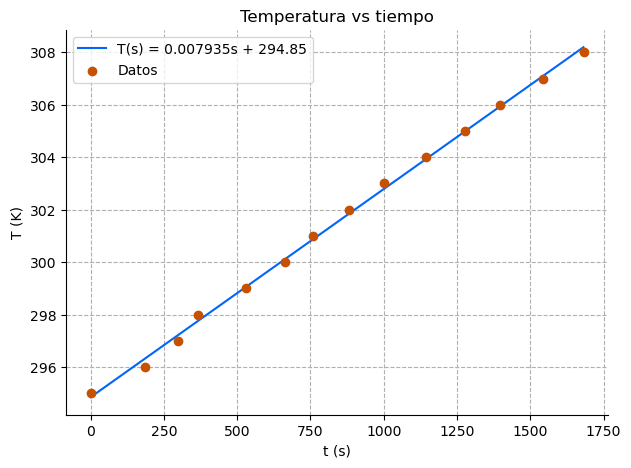

In [19]:
graph(wdata,'Temperatura vs tiempo',wx,wfit)

TypeError: list indices must be integers or slices, not tuple

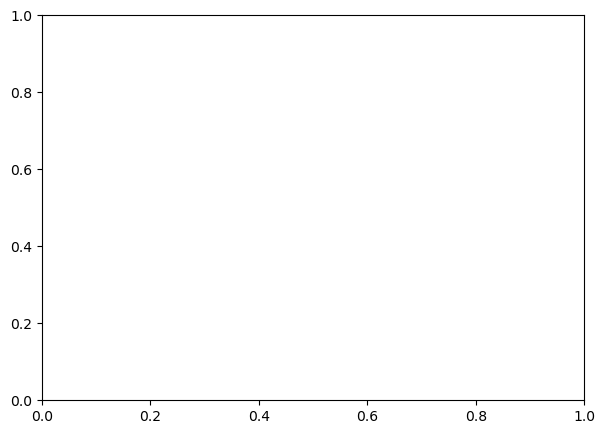

In [23]:
graph(heatp, "Calor acumulado",heatw)

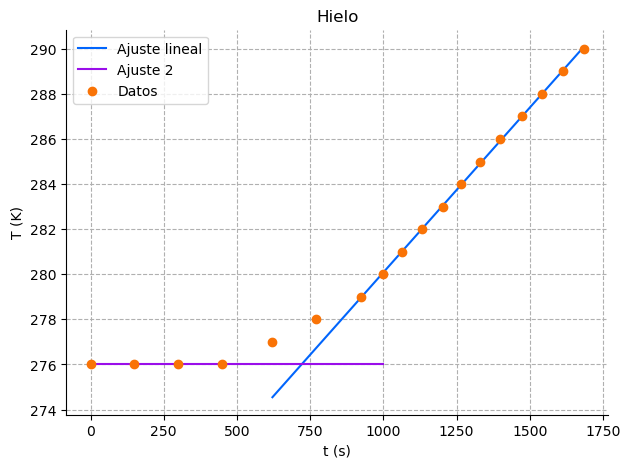

In [33]:
graph(idata,'Hielo',ix,ifit,ixf,ifit2)